#### This file is a simple tutorial on how to use the climate_utils module, which is the core of the climate emulator. You can load a historical dataset, a GCM dataset, convert the data, interpolate, and display global or regional average temperatures over multiple years of GCM forecasts.

#### You can also perform temperature forecasting and reconstruction for a specific region. Feel free to modify the notebook according to the regions you want to work with.

In [1]:
import climate_utils as ctl
from shapely.geometry import Point, Polygon
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from sklearn.linear_model import LinearRegression


In [2]:
data = ctl.import_data("tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_201501-210012.nc","D:\\GFDL-ESM4\\ssp585\\")
data_ref = ctl.import_data("tas_Amon_GFDL-ESM4_historical_r3i1p1f1_gr1_185001-194912.nc","D:\\ancien_linux\\stage_4A_2025\\GFDL-ESM4\\")

Fichier trouvé : True
Le fichier s'ouvre correctement avec netCDF4.
Le fichier s'ouvre correctement avec xarray.
Fichier trouvé : True
Le fichier s'ouvre correctement avec netCDF4.
Le fichier s'ouvre correctement avec xarray.


In [3]:
data_converted = ctl.convert_K_to_C(data)
data_ref_converted = ctl.convert_K_to_C(data_ref)

[[[-32.467728  -32.482788  -32.497833  ... -32.422592  -32.437637
   -32.452682 ]
  [-32.63614   -32.692947  -32.749588  ... -32.464783  -32.52205
   -32.579163 ]
  [-31.985397  -32.090485  -32.195496  ... -31.669617  -31.774948
   -31.880219 ]
  ...
  [-30.62004   -30.520432  -30.42099   ... -30.919907  -30.819778
   -30.719818 ]
  [-31.16365   -31.109985  -31.056595  ... -31.326202  -31.271774
   -31.21759  ]
  [-31.802704  -31.790466  -31.778229  ... -31.839432  -31.827179
   -31.814941 ]]

 [[-42.26268   -42.282272  -42.301865  ... -42.203903  -42.223495
   -42.243088 ]
  [-42.592163  -42.663254  -42.734177  ... -42.3779    -42.44948
   -42.52089  ]
  [-42.14029   -42.263     -42.38571   ... -41.772156  -41.894867
   -42.01758  ]
  ...
  [-33.35257   -33.31279   -33.2731    ... -33.472443  -33.432404
   -33.39244  ]
  [-33.369904  -33.35138   -33.333054  ... -33.426605  -33.40753
   -33.388626 ]
  [-33.657974  -33.657852  -33.657745  ... -33.65831   -33.658188
   -33.65808  ]]

 [[

In [4]:
data_conv_interpolated = ctl.interpolation(data_converted,2.5)
data_ref_conv_interpolated = ctl.interpolation(data_ref_converted,2.5)

D:\anaconda3\envs\stage\Lib\site-packages\xesmf\smm.py:131: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
D:\anaconda3\envs\stage\Lib\site-packages\xesmf\smm.py:131: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


2100 janvier


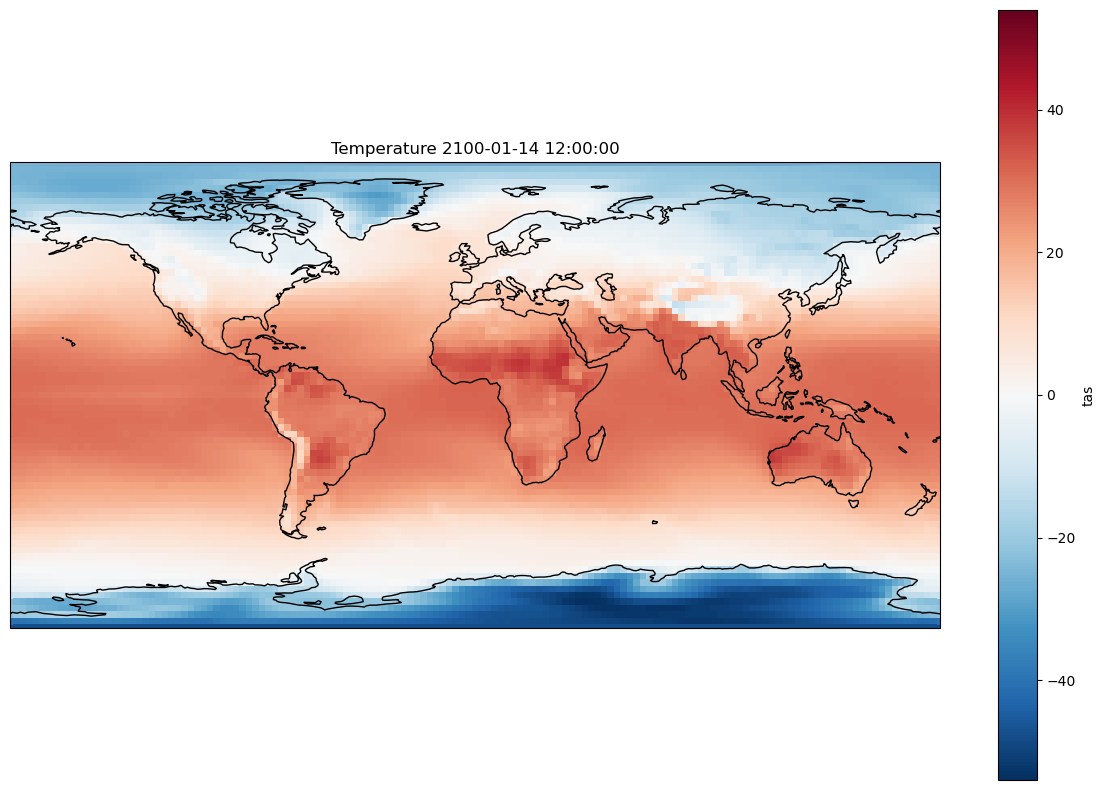

1850 janvier


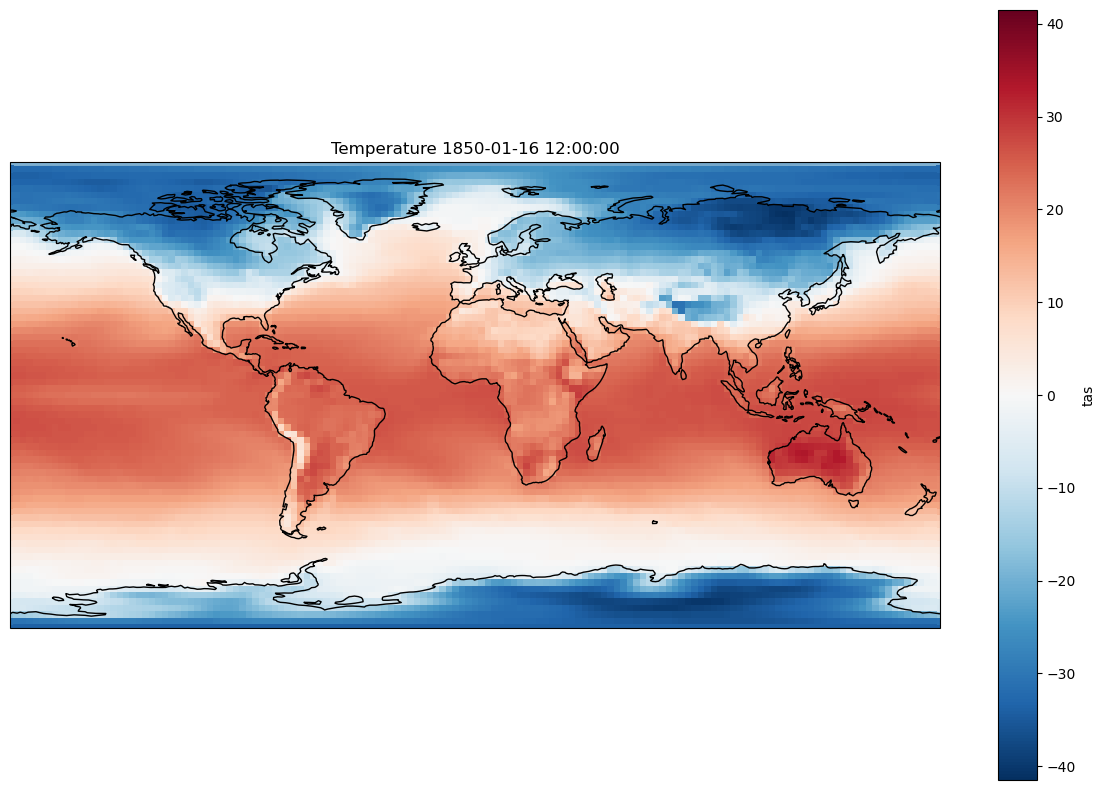

In [5]:
ctl.plot(data_conv_interpolated,2100,"janvier")
ctl.plot(data_ref_conv_interpolated,1850,"janvier")

2100 janvier
Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


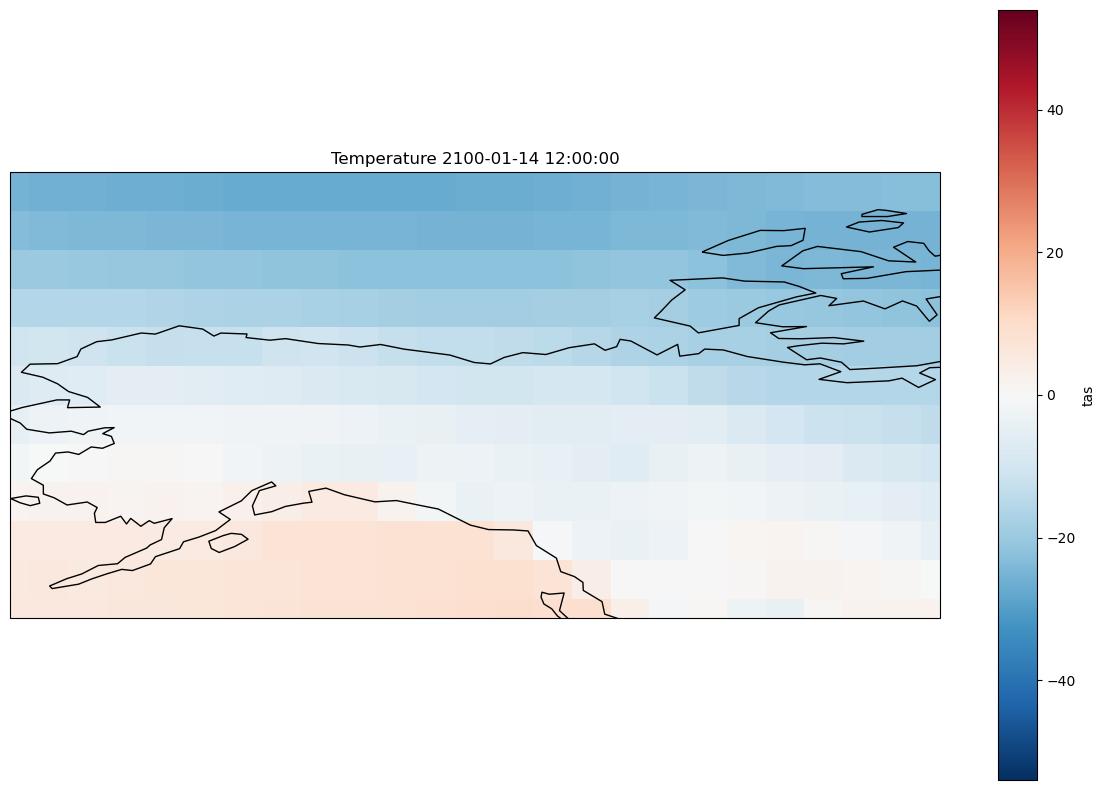

In [23]:
ctl.plot_region(data_conv_interpolated,2100,"janvier","NWN","D:\\ancien_linux\\Stage\\Atlas-main\\reference-regions\\","IPCC-WGI-reference-regions-v4_coordinates.csv")

#### You can use this fonction with the file that provides all the regions and create a dataset within all the points inside the region you want

In [7]:
dataset_regional = ctl.region_centered(data_conv_interpolated,"NWN","D:\\ancien_linux\\Stage\\Atlas-main\\reference-regions\\","IPCC-WGI-reference-regions-v4_coordinates.csv")


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


#### This is another version of the fonction above, this time you can use a defined polygon on which you want to focuse to have your information, you must create the polygon on google earth to have the supported format of the polygon

In [8]:
region_canada_gerad = ctl.polygon_from_kml("Stage_4A (1).kml","C:\\Users\\forest\\OneDrive - Université Clermont Auvergne\\Documents\\4A\\stage_4A_2025\\")
ctl.region_centered_poly(data_conv_interpolated,region_canada_gerad[0])

D:\anaconda3\envs\stage\Lib\site-packages\fastkml\config.py:39: UserWarning: Package `lxml` missing. Pretty print will be disabled
  warnings.warn("Package `lxml` missing. Pretty print will be disabled")  # noqa: B028


<xarray.Dataset> Size: 2MB
Dimensions:  (time: 1032, lat: 14, lon: 33, bnds: 2)
Coordinates:
  * bnds     (bnds) float64 16B 1.0 2.0
    height   float64 8B ...
  * time     (time) float64 8kB 6.024e+04 6.027e+04 ... 9.157e+04 9.16e+04
  * lat      (lat) float64 112B 50.0 52.5 55.0 57.5 60.0 ... 75.0 77.5 80.0 82.5
  * lon      (lon) float64 264B 40.0 42.5 45.0 47.5 ... 112.5 115.0 117.5 120.0
Data variables:
    tas      (time, lat, lon) float32 2MB nan nan nan ... -7.678 -7.978 -8.304
Attributes:
    regrid_method:  bilinear

### This function stand for building the anomalies dataset, you need , your dataset, a reference dataset for making the anomalies and you set the reference periode of years you want

In [9]:
anomalies = ctl.build_anomalies(data_conv_interpolated,data_ref_conv_interpolated,(1850,1900))

In [10]:
regions_anomalie = ctl.regional_anomalie_byear(anomalies,ctl.polygon_from_kml("Stage_4A (1).kml","C:\\Users\\forest\\OneDrive - Université Clermont Auvergne\\Documents\\4A\\stage_4A_2025\\"))


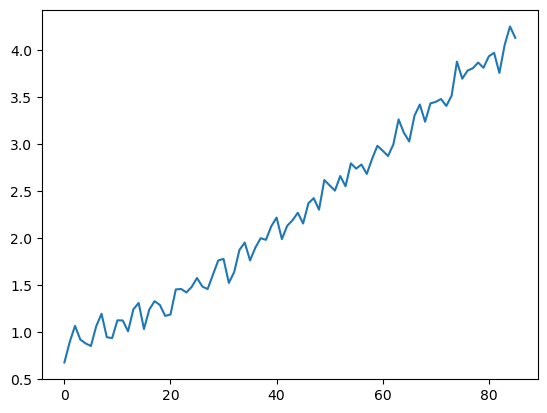

In [11]:
global_temp = ctl.global_anomalie_byear(anomalies)
plt.plot(global_temp)

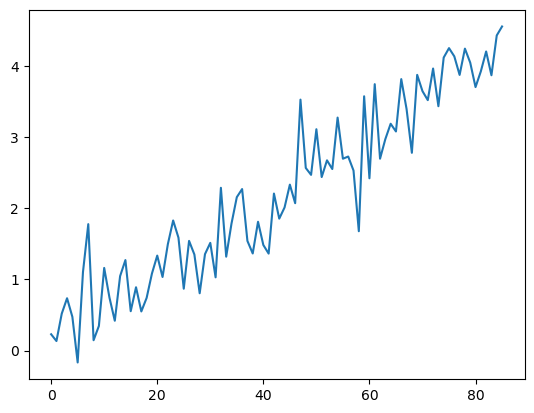

In [12]:
plt.plot(regions_anomalie[0])

In [13]:
dataset_regional = ctl.region_centered(anomalies,"NWN","D:\\ancien_linux\\Stage\\Atlas-main\\reference-regions\\","IPCC-WGI-reference-regions-v4_coordinates.csv")
#dataset_regional = ctl.region_centered_poly(anomalies,region_canada_gerad[0])
dataset_regional

Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


<xarray.Dataset> Size: 1MB
Dimensions:  (time: 1032, lat: 12, lon: 25, bnds: 2)
Coordinates:
  * bnds     (bnds) float64 16B 1.0 2.0
    height   (time) float64 8kB 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
  * time     (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat      (lat) float64 96B 52.5 55.0 57.5 60.0 62.5 ... 72.5 75.0 77.5 80.0
  * lon      (lon) float64 200B 12.5 15.0 17.5 20.0 22.5 ... 65.0 67.5 70.0 72.5
    month    (time) int64 8kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    tas      (time, lat, lon) float32 1MB nan nan nan nan ... nan 22.62 22.84

In [14]:
#il manque la possibilité d'afficher la région et ses températures sur un globe , sinon après c'es formation de la matrice X et y puis lifting scheme puis évaluation 
tas = xr.decode_cf(dataset_regional)
tas_january = tas.sel(time=tas['time.month'] == 1)

# Vérification : on doit obtenir 86 time steps (1 par année)
# Puis conversion en numpy
y_true = tas_january['tas'].values 

In [15]:
region = "NWN"  # Exemple de région NEN ENA NWN

month_index = { "janvier":0,"fevrier":1,"mars":2,"avril":3,"mai":4,"juin":5,"juillet":6,"aout":7,"septembre":8,"octobre":9,"novembre":10,"decembre":11}  # Janvier
X = np.array(global_temp)
y = []

# conversion temps
time = ctl.cftime.num2pydate(data_conv_interpolated.time.values,data_conv_interpolated.time.units,calendar='standard')
mois = "janvier"  # janvier, avril, aout, novembre
for i in range(0, 1032, 12):  
    

    # Température régionale du mois donné
    tas_month = anomalies.isel(time=i + month_index[mois])  # i est janvier, i+1 = février, etc.
    tas_month_region = ctl.region_centered(tas_month, region,"D:\\ancien_linux\\Stage\\Atlas-main\\reference-regions\\","IPCC-WGI-reference-regions-v4_coordinates.csv")
   #tas_month_region = region_centered_poly(anomalies,region_canada_gerad[0]) 
    regional_month_mean = ctl.globalmean(tas_month_region).tas


    y.append(regional_month_mean)  # Label: température régionale au mois choisi


y = np.array(y)
 

Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


In [16]:
X = np.array(X)
X=X.reshape(-1, 1)

In [17]:
x = X
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)


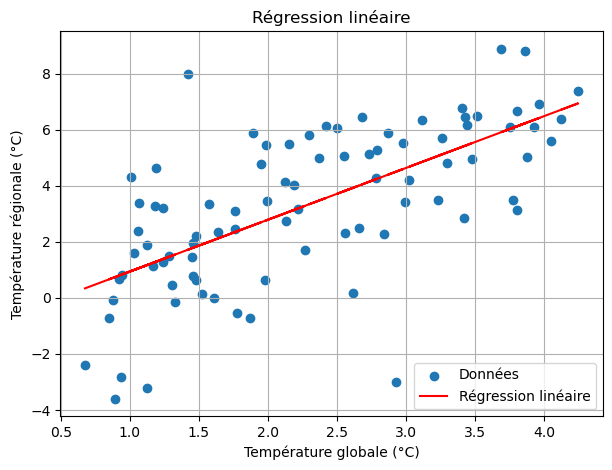

In [18]:
# 1. Données + régression
plt.figure(figsize=(7, 5))
plt.scatter(x, y, label='Données')
plt.plot(x, y_pred, color='red', label='Régression linéaire')
plt.xlabel("Température globale (°C)")
plt.ylabel("Température régionale (°C)")
plt.title("Régression linéaire")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
data_reconstructed = ctl.apply_lifitng_scheme(ctl.region_centered(anomalies,"NWN","D:\\ancien_linux\\Stage\\Atlas-main\\reference-regions\\","IPCC-WGI-reference-regions-v4_coordinates.csv").tas,y_pred)
#data_reconstructed = ctl.apply_lifitng_scheme(region_centered_poly(anomalies,region_canada_gerad[0]).tas,y_pred)


Fichier trouvé : True


C:\Users\forest\OneDrive - Université Clermont Auvergne\Documents\4A\stage_4A_2025\climate_utils.py:149: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coordinates_df = regions_points.applymap(extract_coordinates)


Performing stage 1 of the lifting scheme
Nombre d’éléments par cluster :
Cluster 1.0 : 2 éléments
Cluster 2.0 : 2 éléments
Cluster 3.0 : 2 éléments
Cluster 4.0 : 2 éléments
Cluster 5.0 : 2 éléments
Cluster 6.0 : 2 éléments
Cluster 7.0 : 2 éléments
Cluster 8.0 : 2 éléments
Cluster 9.0 : 2 éléments
Cluster 10.0 : 2 éléments
Cluster 11.0 : 3 éléments
Cluster 12.0 : 3 éléments
Cluster 13.0 : 2 éléments
Cluster 14.0 : 2 éléments
Cluster 15.0 : 2 éléments
Cluster 16.0 : 2 éléments
Cluster 17.0 : 3 éléments
Cluster 18.0 : 2 éléments
Cluster 19.0 : 3 éléments
Cluster 20.0 : 2 éléments
Cluster 21.0 : 2 éléments
Cluster 22.0 : 2 éléments
Cluster 23.0 : 3 éléments
Cluster 24.0 : 2 éléments
Cluster 25.0 : 2 éléments
Cluster 26.0 : 2 éléments
Cluster 27.0 : 2 éléments
Cluster 28.0 : 2 éléments
Cluster 29.0 : 2 éléments
Cluster 30.0 : 2 éléments
Cluster 31.0 : 2 éléments
Cluster 32.0 : 3 éléments
Cluster 33.0 : 2 éléments
Cluster 34.0 : 2 éléments
Cluster 35.0 : 2 éléments
Cluster 36.0 : 2 éléments


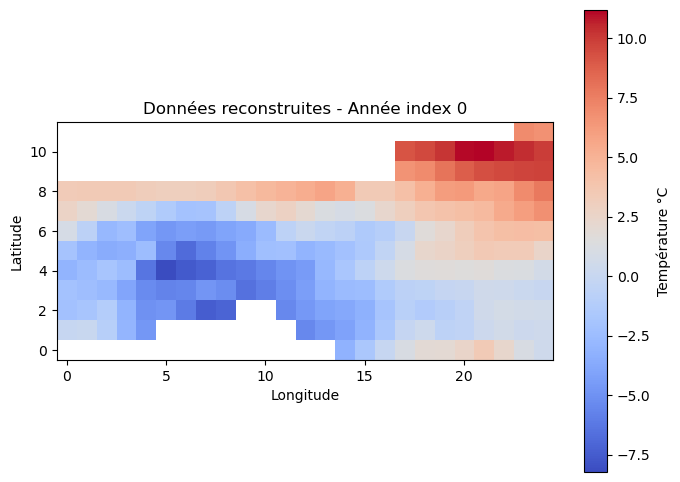

In [20]:
ctl.show_result(data_reconstructed,0)

In [21]:
# RMSE global par année (un RMSE par time step, donc par année)

rmse_by_year = np.sqrt(np.nanmean((y_true - data_reconstructed)**2, axis=(1, 2)))

rmse_by_year

array([2.68509105, 4.87450441, 3.18333966, 0.07016423, 0.970296  ,
       1.95617582, 1.80250418, 4.1160523 , 0.55708316, 4.46309069,
       4.89131023, 1.47503163, 4.91578973, 0.20776153, 1.31509034,
       1.46684185, 2.7151277 , 1.67263519, 0.67150021, 0.74052918,
       3.17941551, 0.48962253, 0.33119982, 8.59046162, 1.51443482,
       2.40799555, 0.56231557, 0.5122674 , 2.02944   , 1.59395875,
       2.53507093, 1.11132194, 1.16647814, 3.47269984, 3.27726651,
       1.80444489, 5.13645774, 2.22079889, 1.27996894, 2.43416704,
       0.73533201, 4.16336021, 0.23646039, 2.31425948, 1.06341625,
       4.05923967, 2.6995486 , 4.80687405, 4.55239508, 2.89064331,
       0.21942637, 3.71887984, 1.2830632 , 2.69358127, 2.39281041,
       2.99448283, 2.04725336, 4.42232066, 0.55050757, 3.101378  ,
       7.01962891, 3.1776683 , 0.0549465 , 2.54966811, 3.65847376,
       0.74656728, 1.05002861, 0.89205393, 0.23687107, 3.31882563,
       2.98358947, 1.27247571, 3.70890178, 3.37453299, 0.10726